In [ ]:
## Initializing the Sensor to Gather Data from it

import time
import board
import busio
import adafruit_mlx90640
import numpy as np 

# Setup the IR Camera; code form Adafruit Specs
i2c = busio.I2C(board.SCL, board.SDA, frequency=800000)
mlx = adafruit_mlx90640.MLX90640(i2c)
mlx.refresh_rate = adafruit_mlx90640.RefreshRate.REFRESH_2_HZ
print("Camera is ready")
 
#make a function to take 3 snapshots with the IR camera and average out the data
def get_data(snaps=3):
    all_snaps = []
    for i in snaps:
        capture = [0] * 768 #Camera grabs 768 pixels of info; 24x32
        mlx.getFrame(capture) #Gets the data in frame of the capture list
        all_captures.append(np.array(capture)) #append captured data to a list     
    mean_array = np.mean(np.array(all_captures), axis=0) #turn to a numpy array that's averaged 
    return np.reshape(mean_array, (24, 32)) #reshapes the output to the proper dataframe

<IPython.core.display.Javascript object>


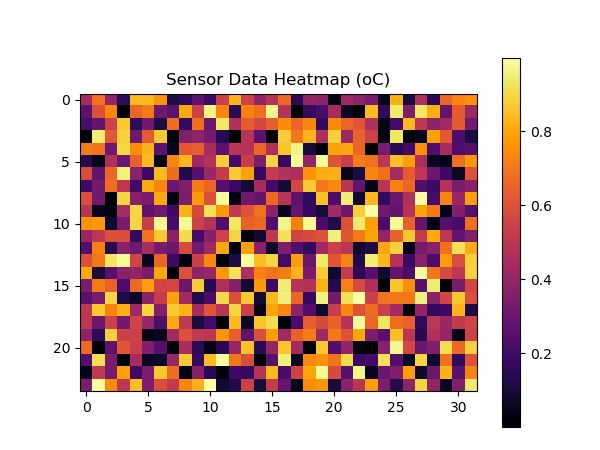

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib notebook
import time

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(111)

while True:
    temperatures = np.random.random((24,32)) #test data to make sure things work
    #temperatures = get_data() #get the temperature data from the IR camera
    heat = plt.imshow(temperatures, cmap='inferno', interpolation='nearest') #initialize the heatmap
    legend = plt.colorbar(heat) #make a legend for the captured data
    fig.canvas.draw() #plot the heatmap
    plt.title('Sensor Data Heatmap (oC)') 
    time.sleep(0.1) #take a sleep
    legend.remove() #remove the legend for the new legend to be added for the new data